# Assignment 1 - Linear Regression

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

## Data Processing

### Loading Data

In [149]:
data = pd.read_csv('podatki_PM.csv')

# Date | Global Radiation | Wind Speed | Wind gust max | Precipitation sum | Moisture mean | Temparature Blood Mean |Temparture location mean | PM10 | PM_Today | sindD| cos D
new_names = {
'Datum' : 'Date',
'Glob_sevanje_mean' : 'Global_radiation_mean',
'Hitrost_vetra_mean' : 'Wind_speed_mean',
'Sunki_vetra_max' : 'Wind_gust_max',
'Padavine_sum' : 'Precipitation_sum',
'Vlaga_mean' : 'Moisture_mean',
'Temperatura_Krvavec_mean' : 'Temperature_Krvavec_mean',
'Temperatura_lokacija_mean' : 'Temperature_location_mean',
'PM10' : 'PM10',
'PM_vceraj' : 'PM_yesterday',
'sinD' : 'sinD',
'cosD' : 'cosD'
}

data.rename(columns=new_names, inplace=True)

# Convert column date into datetime
data['Date'] = pd.to_datetime(data['Date'])

# sort by date
data = data.sort_values(by='Date')

### Data overview

In [150]:
data.head()

# Date | Global Radiation | Wind Speed | Wind gust max | Precipitation sum | Moisture mean | Temparature Blood Mean |Temparture location mean | PM10 | PM_Today | sindD| cos D

,Date,Global_radiation_mean,Wind_speed_mean,Wind_gust_max,Precipitation_sum,Moisture_mean,Temperature_Krvavec_mean,Temperature_location_mean,PM10,PM_yesterday,sinD,cosD
0,2013-01-02,0.125,0.6750,2.9,0.0,79.1750,-2.9875,3.2000,44.3,51.4,0.034899,0.999391
1,2013-01-03,0.375,0.7375,2.6,0.0,93.5625,-4.5250,2.8750,49.0,44.3,0.052336,0.998630
2,2013-01-04,0.875,0.8875,3.2,0.0,93.3000,2.9625,0.6875,61.3,49.0,0.069756,0.997564
3,2013-01-05,0.750,1.0000,4.5,0.0,94.2625,2.9875,0.5875,38.9,61.3,0.087156,0.996195
4,2013-01-06,0.250,0.5750,2.3,0.0,87.6500,-0.2500,3.1625,30.3,38.9,0.104528,0.994522


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       1213 non-null   datetime64[ns]
 1   Global_radiation_mean      1213 non-null   float64       
 2   Wind_speed_mean            1213 non-null   float64       
 3   Wind_gust_max              1213 non-null   float64       
 4   Precipitation_sum          1213 non-null   float64       
 5   Moisture_mean              1213 non-null   float64       
 6   Temperature_Krvavec_mean   1213 non-null   float64       
 7   Temperature_location_mean  1213 non-null   float64       
 8   PM10                       1213 non-null   float64       
 9   PM_yesterday               1180 non-null   float64       
 10  sinD                       1213 non-null   float64       
 11  cosD                       1213 non-null   float64       
dtypes: dat

In [152]:
data.describe()

,Date,Global_radiation_mean,Wind_speed_mean,Wind_gust_max,Precipitation_sum,Moisture_mean,Temperature_Krvavec_mean,Temperature_location_mean,PM10,PM_yesterday,sinD,cosD
count,1213,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1180.000000,1213.000000,1213.000000
mean,2014-12-16 00:33:14.394064384,37.489963,0.889355,3.521599,1.283182,85.553038,3.591235,9.333694,25.059110,25.161864,0.075354,-0.032182
min,2013-01-02 00:00:00,0.000000,0.000000,0.000000,0.000000,35.412500,-14.750000,-9.675000,1.800000,1.800000,-1.000000,-1.000000
25%,2013-12-19 00:00:00,2.125000,0.537500,2.300000,0.000000,79.750000,-1.562500,3.375000,14.400000,14.400000,-0.601815,-0.754710
50%,2014-11-17 00:00:00,20.875000,0.725000,2.800000,0.000000,87.850000,3.750000,10.162500,20.300000,20.350000,0.139173,-0.069756
75%,2016-02-26 00:00:00,66.250000,1.050000,4.100000,0.200000,93.287500,8.475000,15.075000,30.200000,30.300000,0.754710,0.694658
max,2016-12-30 00:00:00,138.375000,4.612500,14.900000,38.500000,99.712500,52.400000,24.087500,114.900000,114.900000,1.000000,1.000000
std,NaN,40.804089,0.606833,1.991321,4.107405,9.926650,7.034411,7.152552,16.495061,16.592885,0.693109,0.716733


In [153]:
# Checking the missing values
data.isnull().sum()

Date                          0
Global_radiation_mean         0
Wind_speed_mean               0
Wind_gust_max                 0
Precipitation_sum             0
Moisture_mean                 0
Temperature_Krvavec_mean      0
Temperature_location_mean     0
PM10                          0
PM_yesterday                 33
sinD                          0
cosD                          0
dtype: int64

### Dealing with missing data

In [154]:
# I decided to fill PM_yesterday by the mean:
data['PM_yesterday'].fillna(data['PM_yesterday'].mean(), inplace=True)

C:\Users\doria\AppData\Local\Temp\ipykernel_4528\2011081706.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PM_yesterday'].fillna(data['PM_yesterday'].mean(), inplace=True)


## Visulaise the data

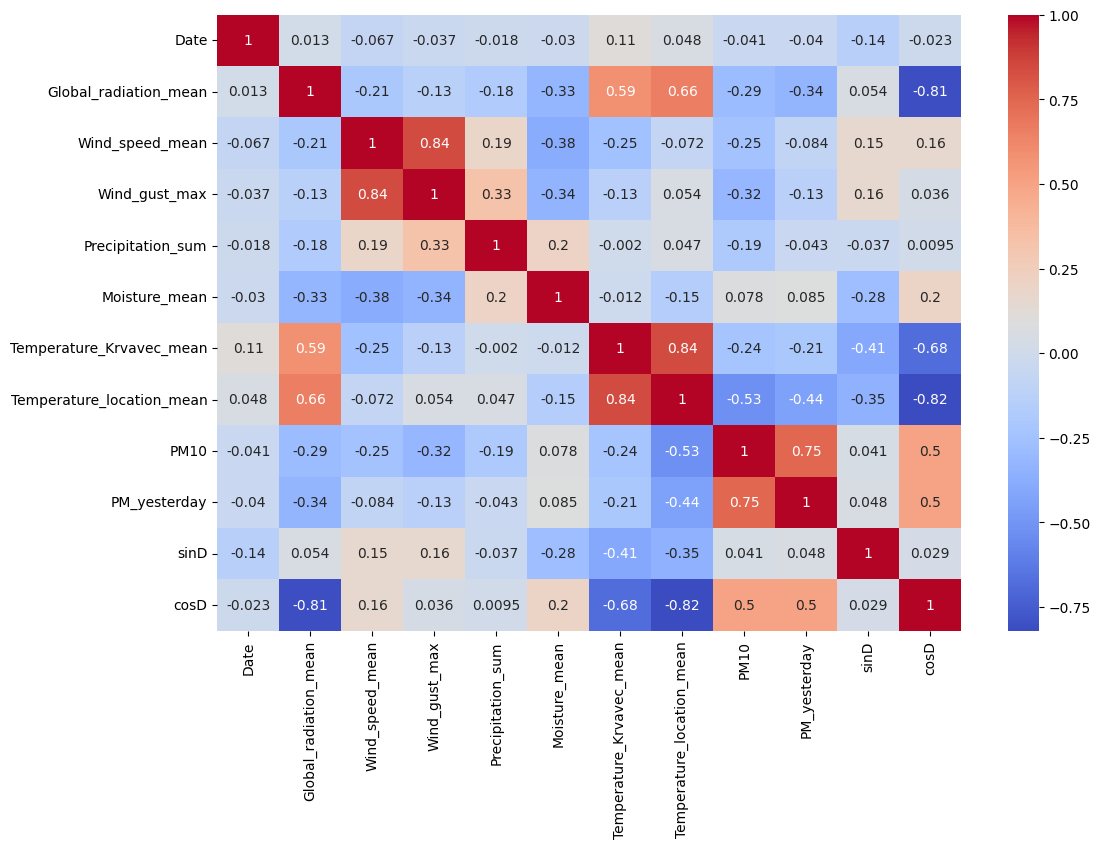

In [155]:
# Corrplot to identify patterns

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

## Select output y and features x
$y$ is `PM10` the features are everything else

In [156]:
X = data[['Global_radiation_mean', 'Wind_speed_mean', 'Wind_gust_max', 'Precipitation_sum',
          'Moisture_mean', 'Temperature_Krvavec_mean', 'Temperature_location_mean',
          'PM_yesterday', 'sinD', 'cosD']]
y = data['PM10']

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
# Split dataset between training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## Scaling
We scale after the splitting to avoid the data leakage

In [159]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [160]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Linear regression

If we have $X=X_0,\cdots,X_p$ and we want to predict a real output $Y$, the linear regression model is of the form :

$$
\begin{align*}
f(X) &= \beta_0 + \sum_{j=1}^p X_j \beta_j \\
&= \beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p
\end{align*}
$$

Our aim is to minimise $RSS(\beta)$ to find the optimal $\beta$.



From p.45 of ESL, we find the unique solution 
$$
\hat\beta = (X^T X)^{-1} X^T y
$$

with $X$ the $N \times (p+1)$ matrix with each row an input vector (with 1 in the first position for the **intercept $\beta_0$**)

### Homemade linear regression

In [161]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train] # concatenate over the second axis in order to X = [[1,vector_1],[1,vector_2],...]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [162]:
XtX = X_train.T @ X_train

det = np.linalg.det(XtX)

if det > 1e-6: # test if the matrix in invertible
    beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
else:
    beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train # use the Pseudo inverse

y_pred_train = X_train @ beta

y_pred_test = X_test @ beta


In [163]:
rmse_train = root_mean_squared_error(y_train, y_pred_train)
rmse_test = root_mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(r2_train)

0.678420712204219


### Scikit-learn Linear Regression

In [164]:
model = LinearRegression(fit_intercept=False)  # Already added intercept manually
model.fit(X_train, y_train)

y_pred_train_sklearn = model.predict(X_train)
y_pred_test_sklearn = model.predict(X_test)


In [165]:
rmse_train_sklearn = root_mean_squared_error(y_train, y_pred_train_sklearn)
rmse_test_sklearn = root_mean_squared_error(y_test, y_pred_test_sklearn)
r2_train_sklearn = r2_score(y_train, y_pred_train_sklearn)
r2_test_sklearn = r2_score(y_test, y_pred_test_sklearn)

In [166]:
print("Manual - Training RMSE:", rmse_train, "R2:", r2_train)
print("Manual - Testing RMSE:", rmse_test, "R2:", r2_test)
print("Scikit-Learn Model - Training RMSE:", rmse_train_sklearn, "R2:", r2_train_sklearn)
print("Scikit-Learn Model - Testing RMSE:", rmse_test_sklearn, "R2:", r2_test_sklearn)

Manual - Training RMSE: 9.19830456450892 R2: 0.678420712204219
Manual - Testing RMSE: 8.344272469278875 R2: 0.7722542577726482
Scikit-Learn Model - Training RMSE: 9.19830456450892 R2: 0.678420712204219
Scikit-Learn Model - Testing RMSE: 8.344272469278875 R2: 0.7722542577726482


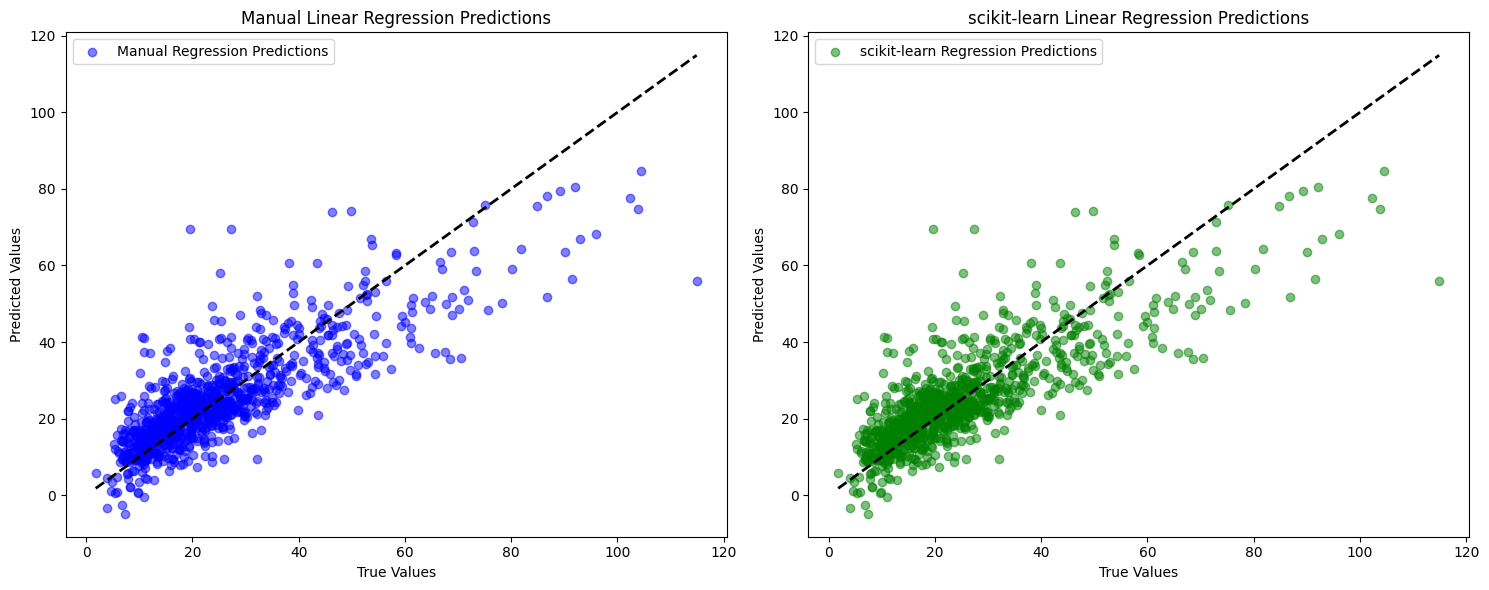

In [167]:
# First subplot: Manual linear regression
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.5, label='Manual Regression Predictions')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Manual Linear Regression Predictions')
plt.legend()

# Second subplot: scikit-learn linear regression
plt.subplot(1, 2, 2)
plt.scatter(y_train, y_pred_train_sklearn, color='green', alpha=0.5, label='scikit-learn Regression Predictions')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('scikit-learn Linear Regression Predictions')
plt.legend()

plt.tight_layout()
plt.show()


## Diagnostics plots
Residual Vs Fitted

Normal QQ

Scale-Location

Residual Vs Leverage

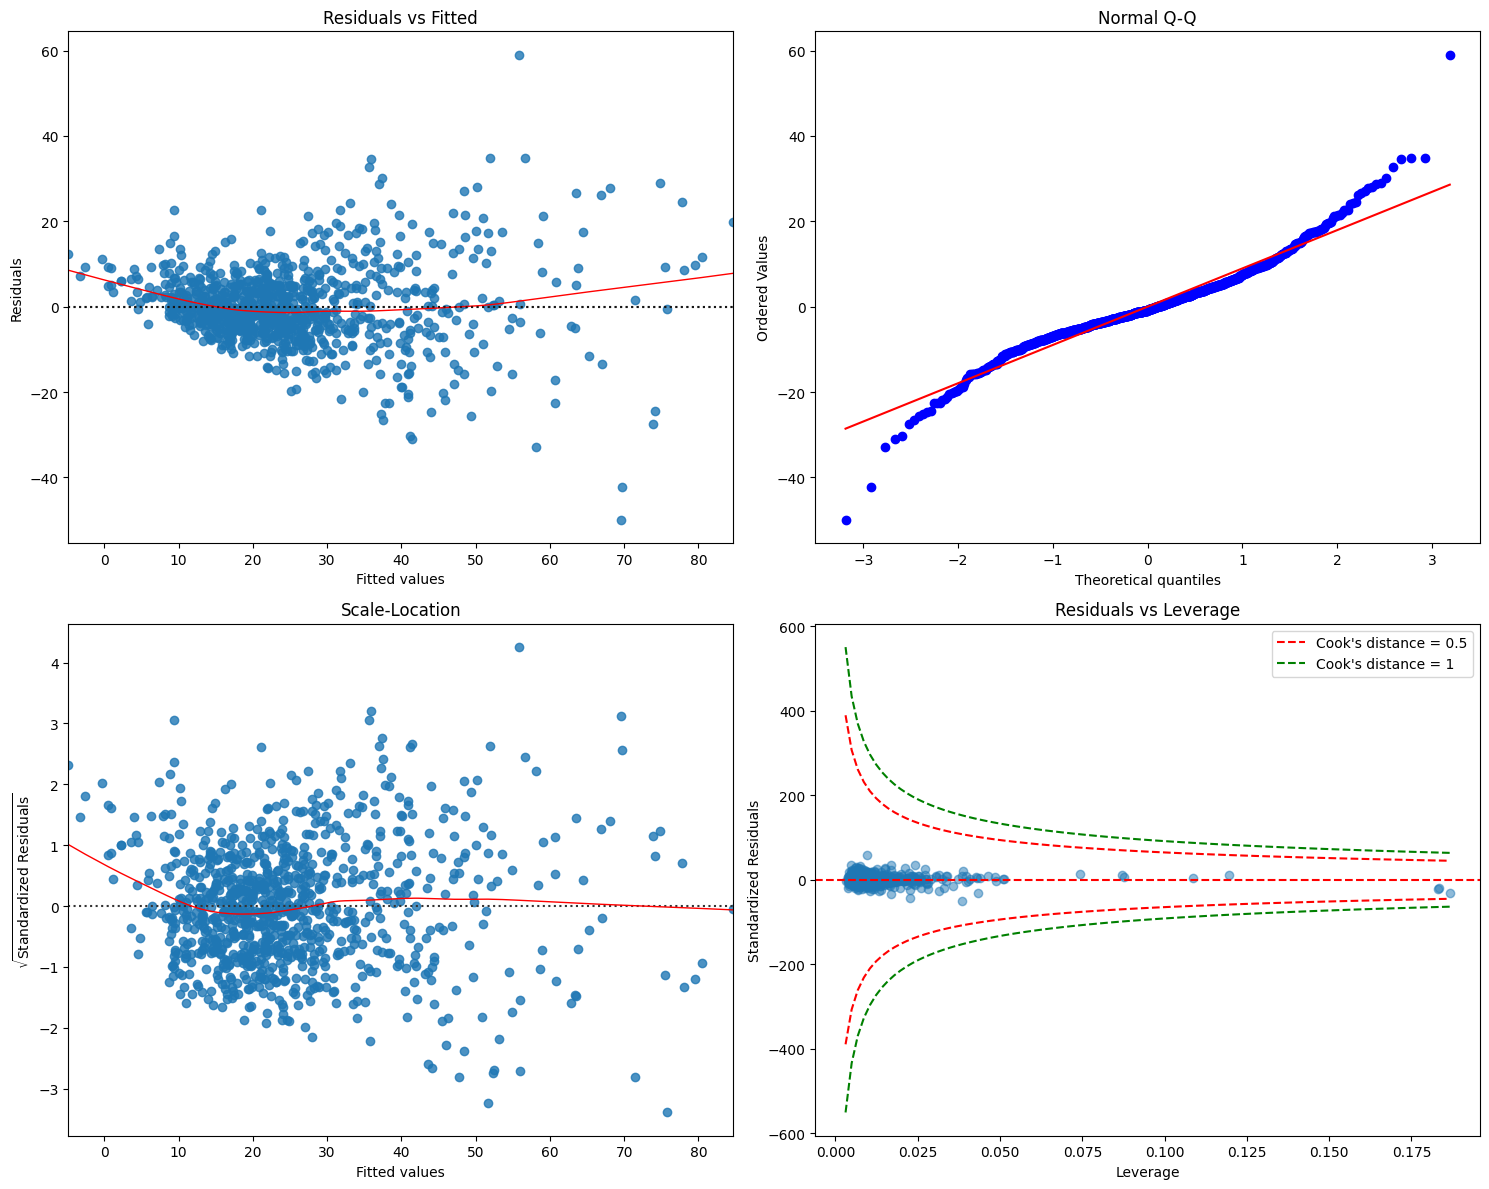

In [168]:
# Calcul des résidus
residuals_train = y_train - y_pred_train

# Création de la figure et des subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# 1. Résidus vs Valeurs ajustées
sns.residplot(x=y_pred_train, y=residuals_train, lowess=True, line_kws={'color':'red', 'lw':1}, ax=axs[0,0])
axs[0, 0].axhline(0, color='black', linestyle='dotted', alpha=0.6)
axs[0, 0].set_xlabel("Fitted values")
axs[0, 0].set_ylabel("Residuals")
axs[0, 0].set_title("Residuals vs Fitted")

# 2. Graphique Q-Q
stats.probplot(residuals_train, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title("Normal Q-Q")

# 3. Scale-Location
sns.residplot(x=y_pred_train, y=np.sqrt(np.abs(residuals_train)), lowess=True, line_kws={'color':'red', 'lw':1}, ax=axs[1,0])
axs[1, 0].set_xlabel("Fitted values")
axs[1, 0].set_ylabel(r"$\sqrt{\text{Standardized Residuals}}$")
axs[1, 0].set_title("Scale-Location")

# 4. Leverage vs Résidus
# Calcul du leverage pour les sous-graphiques
hat_matrix = X_train @ np.linalg.inv(X_train.T @ X_train) @ X_train.T
leverage = np.diag(hat_matrix)

# Calcul de Cook's distance
n, p = X_train.shape  # nombre d'observations et nombre de paramètres
MSE = np.mean(residuals_train**2)
cooks_d = (residuals_train**2 / (p * MSE)) * (leverage / (1 - leverage)**2)

axs[1, 1].scatter(leverage, residuals_train, alpha=0.5)
axs[1, 1].axhline(0, color='red', linestyle='--')
axs[1, 1].set_xlabel("Leverage")
axs[1, 1].set_ylabel("Standardized Residuals")
axs[1, 1].set_title("Residuals vs Leverage")


# Ajout des courbes de Cook à 0.5 et 1
x_vals = np.linspace(min(leverage), max(leverage), 100)
cooks_0_5 = np.sqrt(0.5 * p * MSE * (1 - x_vals) / x_vals)
cooks_1 = np.sqrt(1 * p * MSE * (1 - x_vals) / x_vals)

axs[1, 1].plot(x_vals, cooks_0_5, 'r--', label="Cook's distance = 0.5")
axs[1, 1].plot(x_vals, -cooks_0_5, 'r--')
axs[1, 1].plot(x_vals, cooks_1, 'g--', label="Cook's distance = 1")
axs[1, 1].plot(x_vals, -cooks_1, 'g--')

# Légende pour les courbes de Cook
axs[1, 1].legend()

# Ajustement de l'espace entre les sous-plots
plt.tight_layout()
plt.show()


### Interpretation
1. **Residials vs Fitted values**: 
This plot shows residuals against fitted values to assess model linearity. In this case, the red line is roughly horizontal, indicating that the residuals have a linear pattern.
2. **Q-Q plot**: Most points align with the diagonal, suggesting that residuals are normally distribued. Minor deviations at the tails indicate potential outliers or slight non-normality, but overall, the residuals are sufficiently normal for this model.
3. **Scale-Location Plot**: This plot assesses homoscedasticity, ideally showing a horizontal spread of points, emphasised by the red line. Again, the red line is roughly horizontal, suggesting the possibility of homoscedasticity. While mostly consistent, slight variation in spread suggests mild heteroscedasticity, implying that variance stabilization techniques could improve the model.
4. **Residuals vs Leverage with Cook’s Distance**:
This plot identifies influential observations, with Cook’s distance curves at 0.5 and 1. No points fall outside these thresholds, indicating no single observation overly influences the model. This suggests that the model is robust to individual data points.

#### Conclusion 
Overall, the diagnostics show that the model follows the linear regression assumptions fairly well, with a few areas for improvement:
- Slightly uncertain homoscedasticity (Scale-Location).
- No major influential values (thanks to Cook's distance curves).

Possible improvements could include transforming the variables to ensure homoscedasticity and exploring non-linear terms to better capture the variance of the residuals.

In [169]:
# Ajoutez la constante directement dans le DataFrame pour garder les noms des colonnes
X_train_df = pd.DataFrame(X_train, columns=["Constant"] + list(data[['Global_radiation_mean', 'Wind_speed_mean', 'Wind_gust_max', 'Precipitation_sum',
                                                                      'Moisture_mean', 'Temperature_Krvavec_mean', 'Temperature_location_mean',
                                                                      'PM_yesterday', 'sinD', 'cosD']].columns))

# Calcul du VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]

print(vif_data)

                     Variable       VIF
0                    Constant  1.000000
1       Global_radiation_mean  3.712393
2             Wind_speed_mean  4.209661
3               Wind_gust_max  4.234385
4           Precipitation_sum  1.321402
5               Moisture_mean  1.806910
6    Temperature_Krvavec_mean  4.362686
7   Temperature_location_mean  7.933042
8                PM_yesterday  1.452030
9                        sinD  1.856234
10                       cosD  5.997719


### VIF Interpretation
The Variance Inflation Factor (VIF) measures the multicollinearity of each predictor variable in the model, with values above 5 often indicating moderate collinearity and values above 10 indicating high collinearity that can destabilize coefficient estimates. Here, `Temperature_location_mean` and `cosD` have VIFs of 7.93 and 5.99, respectively, suggesting moderate multicollinearity that may impact model performance. 

### Next Steps for Enhancing the Linear Regression Model
To address multicollinearity and improve the model's stability and accuracy, we will:

1. **Apply Log Transformation on Select Predictors**: For predictors with high variance, such as `Wind_gust_max`, we will apply `log1p` or `sqrt` to reduce variability and better satisfy linear model assumptions.

2. **Remove Predictors with High Multicollinearity**: If further diagnostics confirm high collinearity, we may remove or combine highly correlated predictors like `Temperature_location_mean` and `cosD`.

These steps aim to enhance model accuracy and interpretability by ensuring predictors are more independent and model assumptions are met.

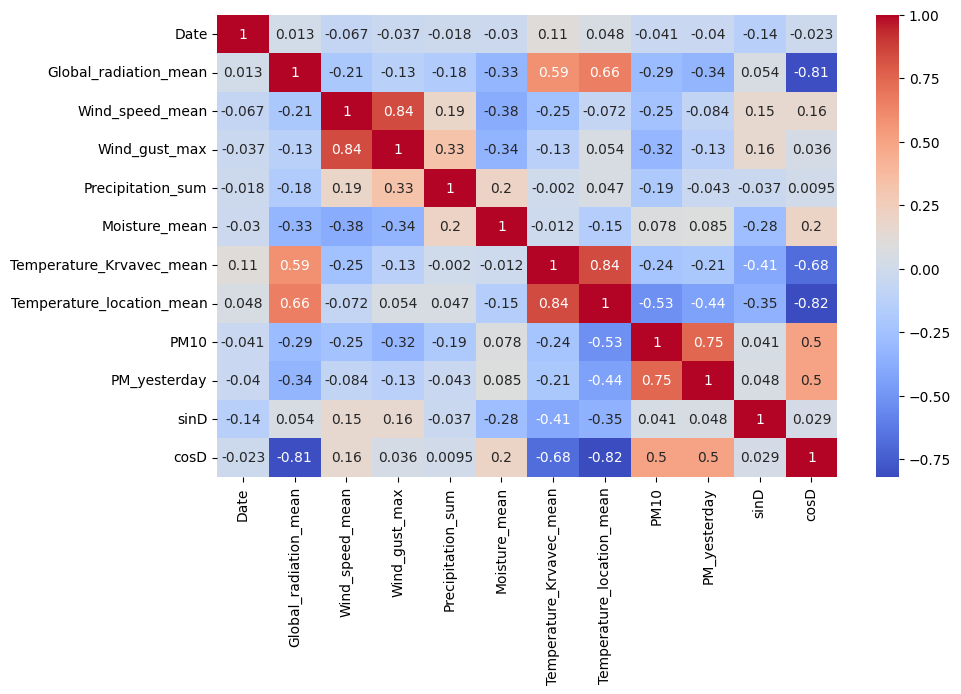

In [170]:
# Lets replot the corrplot:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

This corrplot suggests the redundancy of the following variables:
- `Wind_gust_max` and `Wind_speed_mean`
- `cosD` and `Global_radiation_mean`
- `Temperature_Krvavec_mean` and `Temperature_location_mean`

To improve our model, we will remove `Wind_gust_max`, `cosD` and `Temperature_location_mean` since they are redundant and they have a elevated VIF. 

In [171]:
X_improved = X.drop(columns=['cosD', 'Wind_gust_max', 'Temperature_location_mean'])
X_improved.head()

,Global_radiation_mean,Wind_speed_mean,Precipitation_sum,Moisture_mean,Temperature_Krvavec_mean,PM_yesterday,sinD
0,0.125,0.6750,0.0,79.1750,-2.9875,51.4,0.034899
1,0.375,0.7375,0.0,93.5625,-4.5250,44.3,0.052336
2,0.875,0.8875,0.0,93.3000,2.9625,49.0,0.069756
3,0.750,1.0000,0.0,94.2625,2.9875,61.3,0.087156
4,0.250,0.5750,0.0,87.6500,-0.2500,38.9,0.104528


Now let's apply the linear regression once again

In [172]:
# Split dataset between training and testing
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_improved, y, test_size=0.2, shuffle=False)

# Standard Scaler
X_train_imp = sc.fit_transform(X_train_imp)
X_test_imp = sc.fit_transform(X_test_imp)

# adding a constant column (of ones)
X_train_imp = np.c_[np.ones(X_train_imp.shape[0]), X_train_imp] # concatenate over the second axis in order to X = [[1,vector_1],[1,vector_2],...]
X_test_imp = np.c_[np.ones(X_test_imp.shape[0]), X_test_imp]

# Manual linear regression 
XtX = X_train_imp.T @ X_train_imp

det = np.linalg.det(XtX)

if det > 1e-6: # test if the matrix in invertible
    beta_imp = np.linalg.inv(X_train_imp.T @ X_train_imp) @ X_train_imp.T @ y_train_imp
else:
    beta_imp = np.linalg.pinv(X_train_imp.T @ X_train_imp) @ X_train_imp.T @ y_train_imp # use the Pseudo inverse

y_pred_train_imp = X_train_imp @ beta_imp

y_pred_test_imp = X_test_imp @ beta_imp

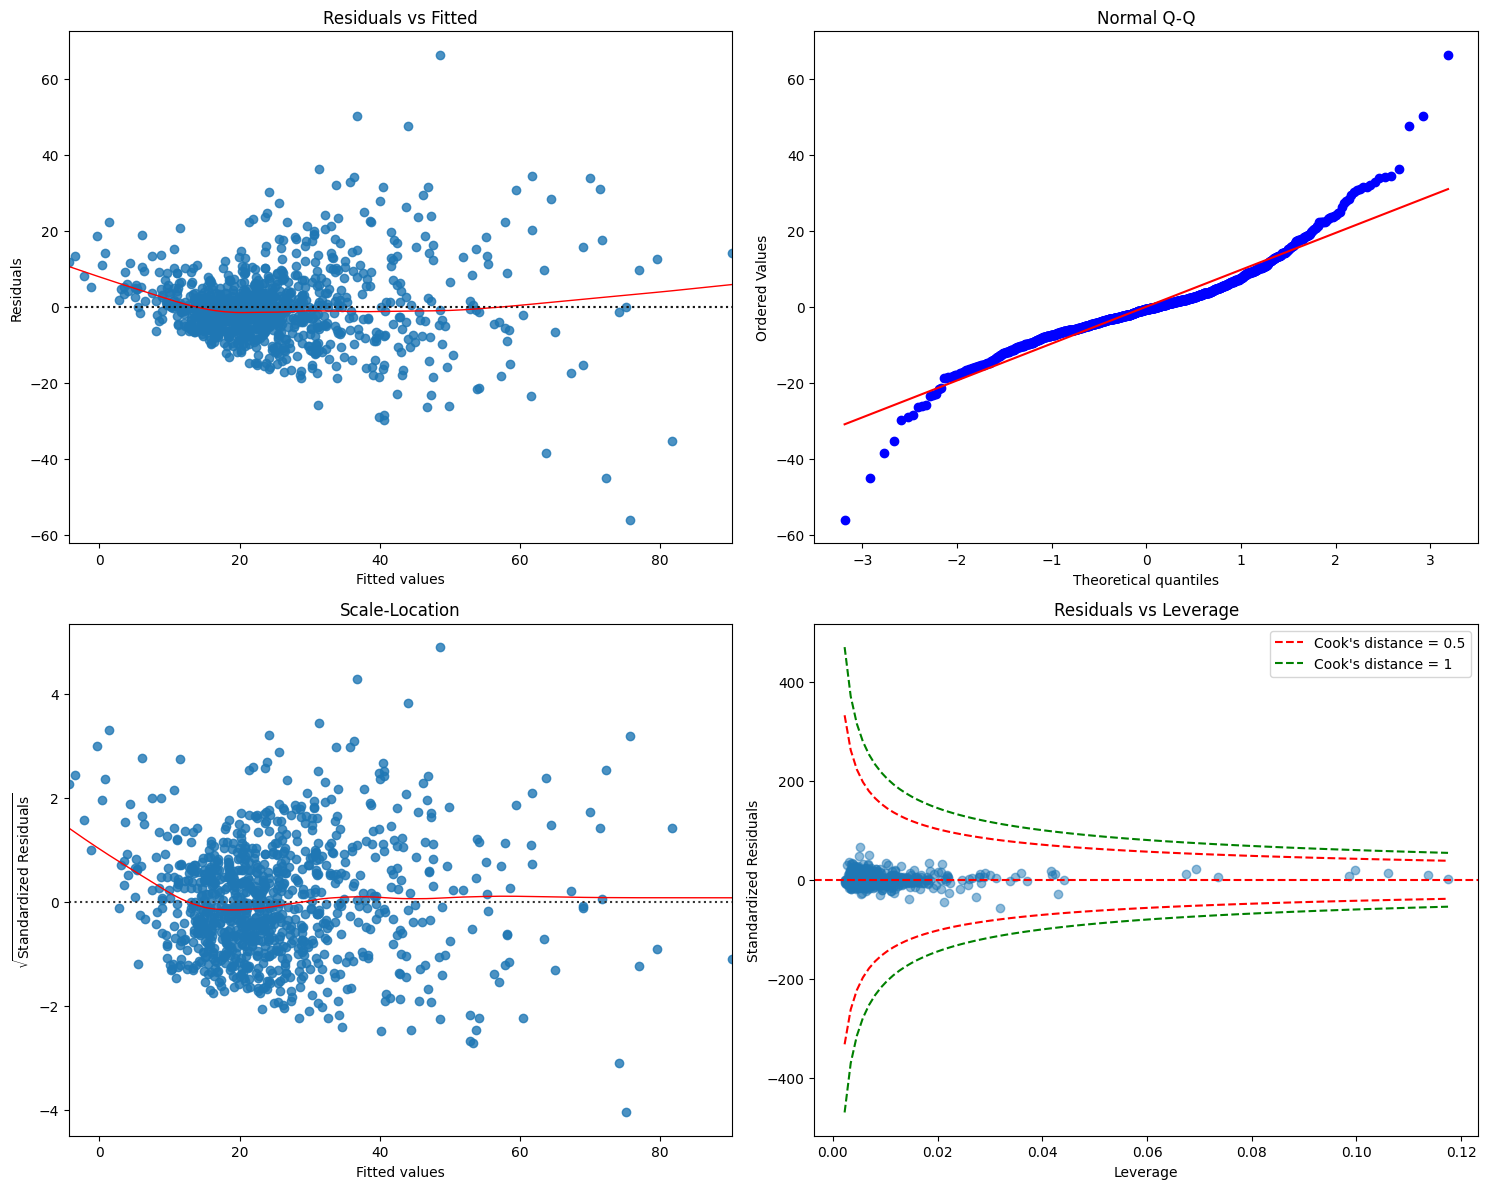

In [173]:
# Calcul des résidus
residuals_train_imp = y_train_imp - y_pred_train_imp

# Création de la figure et des subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# 1. Résidus vs Valeurs ajustées
sns.residplot(x=y_pred_train_imp, y=residuals_train_imp, lowess=True, line_kws={'color':'red', 'lw':1}, ax=axs[0,0])
axs[0, 0].axhline(0, color='black', linestyle='dotted', alpha=0.6)
axs[0, 0].set_xlabel("Fitted values")
axs[0, 0].set_ylabel("Residuals")
axs[0, 0].set_title("Residuals vs Fitted")

# 2. Graphique Q-Q
stats.probplot(residuals_train_imp, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title("Normal Q-Q")

# 3. Scale-Location
sns.residplot(x=y_pred_train_imp, y=np.sqrt(np.abs(residuals_train_imp)), lowess=True, line_kws={'color':'red', 'lw':1}, ax=axs[1,0])
axs[1, 0].set_xlabel("Fitted values")
axs[1, 0].set_ylabel(r"$\sqrt{\text{Standardized Residuals}}$")
axs[1, 0].set_title("Scale-Location")

# 4. Leverage vs Résidus
# Calcul du leverage pour les sous-graphiques
hat_matrix_imp = X_train_imp @ np.linalg.inv(X_train_imp.T @ X_train_imp) @ X_train_imp.T
leverage_imp = np.diag(hat_matrix_imp)

# Calcul de Cook's distance
n, p = X_train_imp.shape  # nombre d'observations et nombre de paramètres
MSE_imp = np.mean(residuals_train_imp**2)
cooks_d_imp = (residuals_train_imp**2 / (p * MSE_imp)) * (leverage_imp / (1 - leverage_imp)**2)

axs[1, 1].scatter(leverage_imp, residuals_train_imp, alpha=0.5)
axs[1, 1].axhline(0, color='red', linestyle='--')
axs[1, 1].set_xlabel("Leverage")
axs[1, 1].set_ylabel("Standardized Residuals")
axs[1, 1].set_title("Residuals vs Leverage")


# Ajout des courbes de Cook à 0.5 et 1
x_vals_imp = np.linspace(min(leverage_imp), max(leverage_imp), 100)
cooks_0_5 = np.sqrt(0.5 * p * MSE * (1 - x_vals) / x_vals)
cooks_1 = np.sqrt(1 * p * MSE * (1 - x_vals) / x_vals)

axs[1, 1].plot(x_vals_imp, cooks_0_5, 'r--', label="Cook's distance = 0.5")
axs[1, 1].plot(x_vals_imp, -cooks_0_5, 'r--')
axs[1, 1].plot(x_vals_imp, cooks_1, 'g--', label="Cook's distance = 1")
axs[1, 1].plot(x_vals_imp, -cooks_1, 'g--')

# Légende pour les courbes de Cook
axs[1, 1].legend()

# Ajustement de l'espace entre les sous-plots
plt.tight_layout()
plt.show()


In [174]:
# Ajoutez la constante directement dans le DataFrame pour garder les noms des colonnes
X_train_imp_df = pd.DataFrame(X_train_imp, columns=["Constant"] + list(data[['Global_radiation_mean', 'Wind_speed_mean', 'Precipitation_sum',
                                                                      'Moisture_mean', 'Temperature_Krvavec_mean', 
                                                                      'PM_yesterday', 'sinD']].columns))

# Calcul du VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_imp_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_imp_df.values, i) for i in range(X_train_imp_df.shape[1])]

print(vif_data)

                   Variable       VIF
0                  Constant  1.000000
1     Global_radiation_mean  2.308829
2           Wind_speed_mean  1.569177
3         Precipitation_sum  1.164651
4             Moisture_mean  1.765329
5  Temperature_Krvavec_mean  2.171834
6              PM_yesterday  1.174215
7                      sinD  1.491906


## Analysis of the results

With less features variables, we cannot see significant improvement in the diagnostic plots. On another hand, the global VIF has diminished, indicating that the model has become more stable, and the coefficients are better interpretable without the effects of excessive variance due to multicollinearity.

# Discussion

If several variables are interdependent, Principal Component Analysis (PCA) can be a solution. It groups correlated variables into new independent components that summarise the information. We could then train our model on these new components to see if we can have improved results on the residuals. 